In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [58]:
#Load meta data for sample dataframe, includes the information for 87 sample.
#Link for more info: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52588
#Link to download file:
# https://ftp.ncbi.nlm.nih.gov/geo/series/GSE52nnn/GSE52588/matrix/GSE52588_series_matrix.txt.gz
meta_df= pd.read_table('GSE52588_series_matrix.txt',skiprows=51,index_col=0)

In [66]:
label=pd.DataFrame(meta_df.loc['!Sample_characteristics_ch1'].iloc[1,:])

In [67]:
label

,!Sample_characteristics_ch1
GSM1272122,disease state: Down syndrome
GSM1272123,disease state: Down syndrome
GSM1272124,disease state: Down syndrome
GSM1272125,disease state: Down syndrome
GSM1272126,disease state: Down syndrome
...,...
GSM1272204,disease state: healthy
GSM1272205,disease state: healthy
GSM1272206,disease state: healthy
GSM1272207,disease state: healthy


In [7]:
#Load sample dataframe, includes the CpGs for 87 sample.
#Link for more info: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52588
#Link to download file:
# https://ftp.ncbi.nlm.nih.gov/geo/series/GSE52nnn/GSE52588/matrix/GSE52588_series_matrix.txt.gz
df = pd.read_table('GSE52588_series_matrix.txt',skiprows=51+36,index_col=0)


In [43]:
#Load coefficients for 651 CpGs
#Link for more info: https://www.nature.com/articles/s41467-021-21064-z#Sec20 
#Supplementary table 2
#Link to download file:
# https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-021-21064-z/MediaObjects/41467_2021_21064_MOESM6_ESM.xlsx
coef=pd.read_excel('41467_2021_21064_MOESM6_ESM.xlsx', sheet_name='EWAS_autosomes', skiprows=2, index_col='CpG')


In [41]:
#find common CpGs between the coefficient table and the sample table
common_indexes = df.index.intersection(coef.index)
len(common_indexes)

317

In [47]:
#coefficients for common CpGs
common_coef=coef.loc[common_indexes]['beta_overall']
common_coef=pd.DataFrame(common_coef)
common_coef

,beta_overall
cg00017931,-0.103422
cg00253658,0.305036
cg00270625,0.282725
cg00443981,0.125699
cg00502597,0.058527
...,...
cg27131667,-0.063509
cg27292710,-0.104862
cg27489873,-0.095791
cg27496339,0.184783


In [78]:
common_coef.isna().any().any()

False

In [82]:
#finding common CpGs for samples
sample_df=df.loc[common_indexes]
sample_df

,GSM1272122,GSM1272123,GSM1272124,GSM1272125,GSM1272126,GSM1272127,GSM1272128,GSM1272129,GSM1272130,GSM1272131,...,GSM1272199,GSM1272200,GSM1272201,GSM1272202,GSM1272203,GSM1272204,GSM1272205,GSM1272206,GSM1272207,GSM1272208
cg00017931,0.069343,0.068834,0.072000,0.095631,0.110837,0.089673,0.066341,0.066888,0.061881,0.067876,...,0.210654,0.224453,0.166254,0.177901,0.203671,0.202415,0.185090,0.149728,0.178416,0.162158
cg00253658,0.619556,0.721325,0.600100,0.676745,0.675025,0.708171,0.622399,0.676886,0.838296,0.711664,...,0.603229,0.323533,0.182045,0.244036,0.404024,0.415811,0.131664,0.379444,0.393996,0.273096
cg00270625,0.970430,0.959236,0.902729,0.889400,0.926609,0.977300,0.786657,0.969419,0.905165,0.880253,...,0.684079,0.647864,0.779535,0.699192,0.800000,0.875369,0.846679,0.772866,0.792166,0.735797
cg00443981,0.932886,0.962882,0.955624,0.933555,0.965171,0.954418,0.942502,0.949044,0.954951,0.924502,...,0.701306,0.862756,0.885808,0.899458,0.895371,0.926158,0.846093,0.901544,0.894843,0.822823
cg00502597,0.275023,0.304443,0.278652,0.254252,0.241509,0.249619,0.234850,0.230992,0.236608,0.238757,...,0.214764,0.227845,0.205511,0.235039,0.189077,0.205782,0.151669,0.212263,0.201104,0.196275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27131667,0.829848,0.825281,0.810556,0.778281,0.803131,0.799517,0.787433,0.824314,0.826367,0.808988,...,0.769376,0.783960,0.766989,0.778950,0.761852,0.807502,0.788819,0.802196,0.745258,0.778558
cg27292710,0.826020,0.796909,0.775992,0.789178,0.763605,0.784424,0.803897,0.810058,0.791003,0.806032,...,0.795363,0.812939,0.778009,0.800603,0.808220,0.809624,0.799832,0.820230,0.773763,0.812899
cg27489873,0.593352,0.580578,0.547126,0.596882,0.524639,0.549625,0.612112,0.577030,0.597159,0.600252,...,0.599323,0.693650,0.670504,0.672701,0.684086,0.707152,0.596994,0.691339,0.681636,0.666930
cg27496339,0.557768,0.490503,0.471154,0.451216,0.491434,0.444159,0.406567,0.301797,0.421072,0.444539,...,0.165963,0.194621,0.138059,0.173664,0.148800,0.152392,0.108882,0.125035,0.153585,0.177311


In [83]:
sample_df.isna().any()

GSM1272122    False
GSM1272123    False
GSM1272124    False
GSM1272125    False
GSM1272126     True
              ...  
GSM1272204     True
GSM1272205    False
GSM1272206     True
GSM1272207     True
GSM1272208     True
Length: 87, dtype: bool

In [84]:
#fill NaN in sample_df with the mean of the corresponding CpG over the sample
def fillna_with_row_mean(row):
    row_mean = row.mean()
    return row.fillna(row_mean)

sample_df = sample_df.apply(fillna_with_row_mean, axis=1)

In [85]:
merged_df = pd.merge(sample_df, common_coef, left_index=True, right_index=True)
merged_df

,GSM1272122,GSM1272123,GSM1272124,GSM1272125,GSM1272126,GSM1272127,GSM1272128,GSM1272129,GSM1272130,GSM1272131,...,GSM1272200,GSM1272201,GSM1272202,GSM1272203,GSM1272204,GSM1272205,GSM1272206,GSM1272207,GSM1272208,beta_overall
cg00017931,0.069343,0.068834,0.072000,0.095631,0.110837,0.089673,0.066341,0.066888,0.061881,0.067876,...,0.224453,0.166254,0.177901,0.203671,0.202415,0.185090,0.149728,0.178416,0.162158,-0.103422
cg00253658,0.619556,0.721325,0.600100,0.676745,0.675025,0.708171,0.622399,0.676886,0.838296,0.711664,...,0.323533,0.182045,0.244036,0.404024,0.415811,0.131664,0.379444,0.393996,0.273096,0.305036
cg00270625,0.970430,0.959236,0.902729,0.889400,0.926609,0.977300,0.786657,0.969419,0.905165,0.880253,...,0.647864,0.779535,0.699192,0.800000,0.875369,0.846679,0.772866,0.792166,0.735797,0.282725
cg00443981,0.932886,0.962882,0.955624,0.933555,0.965171,0.954418,0.942502,0.949044,0.954951,0.924502,...,0.862756,0.885808,0.899458,0.895371,0.926158,0.846093,0.901544,0.894843,0.822823,0.125699
cg00502597,0.275023,0.304443,0.278652,0.254252,0.241509,0.249619,0.234850,0.230992,0.236608,0.238757,...,0.227845,0.205511,0.235039,0.189077,0.205782,0.151669,0.212263,0.201104,0.196275,0.058527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27131667,0.829848,0.825281,0.810556,0.778281,0.803131,0.799517,0.787433,0.824314,0.826367,0.808988,...,0.783960,0.766989,0.778950,0.761852,0.807502,0.788819,0.802196,0.745258,0.778558,-0.063509
cg27292710,0.826020,0.796909,0.775992,0.789178,0.763605,0.784424,0.803897,0.810058,0.791003,0.806032,...,0.812939,0.778009,0.800603,0.808220,0.809624,0.799832,0.820230,0.773763,0.812899,-0.104862
cg27489873,0.593352,0.580578,0.547126,0.596882,0.524639,0.549625,0.612112,0.577030,0.597159,0.600252,...,0.693650,0.670504,0.672701,0.684086,0.707152,0.596994,0.691339,0.681636,0.666930,-0.095791
cg27496339,0.557768,0.490503,0.471154,0.451216,0.491434,0.444159,0.406567,0.301797,0.421072,0.444539,...,0.194621,0.138059,0.173664,0.148800,0.152392,0.108882,0.125035,0.153585,0.177311,0.184783


In [86]:
#Multiply each CPG methylation value with the corresponding coefficient
result_df = merged_df.iloc[:, :-1] * merged_df['beta_overall'].values.reshape(-1, 1)
result_df

,GSM1272122,GSM1272123,GSM1272124,GSM1272125,GSM1272126,GSM1272127,GSM1272128,GSM1272129,GSM1272130,GSM1272131,...,GSM1272199,GSM1272200,GSM1272201,GSM1272202,GSM1272203,GSM1272204,GSM1272205,GSM1272206,GSM1272207,GSM1272208
cg00017931,-0.007172,-0.007119,-0.007446,-0.009890,-0.011463,-0.009274,-0.006861,-0.006918,-0.006400,-0.007020,...,-0.021786,-0.023213,-0.017194,-0.018399,-0.021064,-0.020934,-0.019142,-0.015485,-0.018452,-0.016771
cg00253658,0.188987,0.220030,0.183052,0.206431,0.205907,0.216018,0.189854,0.206475,0.255710,0.217083,...,0.184006,0.098689,0.055530,0.074440,0.123242,0.126837,0.040162,0.115744,0.120183,0.083304
cg00270625,0.274365,0.271200,0.255224,0.251456,0.261976,0.276307,0.222408,0.274079,0.255913,0.248870,...,0.193406,0.183168,0.220394,0.197679,0.226180,0.247489,0.239377,0.218509,0.223965,0.208028
cg00443981,0.117263,0.121034,0.120121,0.117347,0.121321,0.119970,0.118472,0.119294,0.120037,0.116209,...,0.088154,0.108448,0.111345,0.113061,0.112547,0.116417,0.106353,0.113323,0.112481,0.103428
cg00502597,0.016096,0.017818,0.016309,0.014881,0.014135,0.014609,0.013745,0.013519,0.013848,0.013974,...,0.012569,0.013335,0.012028,0.013756,0.011066,0.012044,0.008877,0.012423,0.011770,0.011487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27131667,-0.052703,-0.052413,-0.051478,-0.049428,-0.051006,-0.050777,-0.050009,-0.052351,-0.052482,-0.051378,...,-0.048862,-0.049788,-0.048711,-0.049470,-0.048384,-0.051284,-0.050097,-0.050947,-0.047331,-0.049445
cg27292710,-0.086618,-0.083565,-0.081372,-0.082755,-0.080073,-0.082256,-0.084298,-0.084944,-0.082946,-0.084522,...,-0.083403,-0.085246,-0.081584,-0.083953,-0.084752,-0.084899,-0.083872,-0.086011,-0.081138,-0.085242
cg27489873,-0.056838,-0.055614,-0.052410,-0.057176,-0.050256,-0.052649,-0.058635,-0.055274,-0.057202,-0.057499,...,-0.057410,-0.066445,-0.064228,-0.064439,-0.065529,-0.067739,-0.057186,-0.066224,-0.065294,-0.063886
cg27496339,0.103066,0.090637,0.087061,0.083377,0.090809,0.082073,0.075127,0.055767,0.077807,0.082143,...,0.030667,0.035963,0.025511,0.032090,0.027496,0.028159,0.020120,0.023104,0.028380,0.032764


In [94]:
regression_results=pd.DataFrame(result_df.sum())
regression_results = pd.merge(regression_results, label, left_index=True, right_index=True)
regression_results.rename(columns={0: 'weighted sum'}, inplace=True)
regression_results.rename(columns={'!Sample_characteristics_ch1': 'disease state'}, inplace=True)
regression_results['disease state'] = regression_results['disease state'].str.replace('disease state: ', '')

In [95]:
regression_results

,weighted sum,disease state
GSM1272122,4.410935,Down syndrome
GSM1272123,4.760572,Down syndrome
GSM1272124,4.046291,Down syndrome
GSM1272125,4.120414,Down syndrome
GSM1272126,4.237326,Down syndrome
...,...,...
GSM1272204,-0.965913,healthy
GSM1272205,-1.594017,healthy
GSM1272206,-1.820427,healthy
GSM1272207,-1.759635,healthy


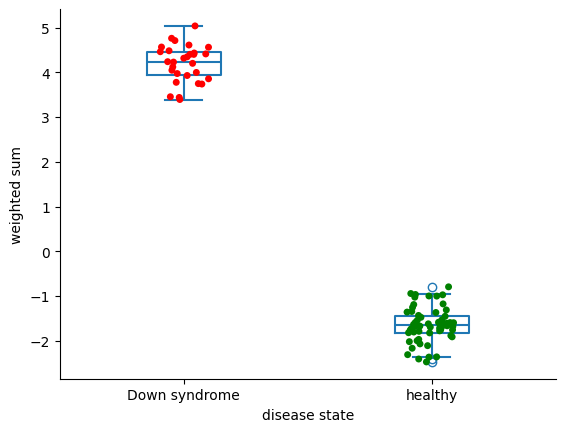

In [109]:
sns.boxplot(x='disease state', y='weighted sum', data=regression_results, width=0.3,  fill=None)
sns.stripplot(x='disease state', y='weighted sum', data=regression_results, jitter=True,palette={'healthy': 'green', 'Down syndrome': 'red'})
sns.despine()